In [16]:
import pandas as pd
import re
import plotly.express as px
import seaborn as sns

# Import Data

In [17]:
df = pd.read_csv("G:\\Internship\\Surge\\For Evaluation\\Project\\data\\datatables\\11_REst.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.260570,-97.734410,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.456970,-97.784220,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.248850,-97.735870,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.260340,-97.764870,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.234660,-97.736820,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,NaN,78725,30.261390,-97.671764,Private room,50,1,0,NaN,NaN,5,269,0,NaN
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,NaN,78723,30.306730,-97.688670,Entire home/apt,157,1,0,NaN,NaN,6,365,0,NaN
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,NaN,78721,30.258485,-97.689087,Entire home/apt,117,1,0,NaN,NaN,19,176,0,NaN
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,NaN,78724,30.317040,-97.654112,Entire home/apt,133,2,0,NaN,NaN,1,268,0,NaN


In [36]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               14861
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3103
reviews_per_month                  3103
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14861
dtype: int64

In [37]:
df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.486100e+04,1.486100e+04,0.0,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,11758.000000,14861.000000,14861.000000,14861.000000,0.0
mean,3.418962e+17,1.455670e+08,NaN,78724.538254,30.281061,-97.749786,269.298769,7.629365,37.843348,1.537180,11.047641,152.092591,10.367674,NaN
std,3.952050e+17,1.608509e+08,NaN,20.681156,0.065000,0.062634,549.376464,28.289063,79.894590,1.711574,24.472357,136.610382,17.111299,NaN
min,5.456000e+03,2.300000e+01,NaN,78701.000000,30.078440,-98.053350,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.401701e+07,1.613528e+07,NaN,78704.000000,30.241870,-97.768528,95.000000,1.000000,1.000000,0.260000,1.000000,1.000000,0.000000,NaN
50%,5.176864e+07,7.039337e+07,NaN,78723.000000,30.269160,-97.740600,150.000000,2.000000,8.000000,0.990000,2.000000,127.000000,2.000000,NaN
75%,7.543632e+17,2.537258e+08,NaN,78745.000000,30.309070,-97.716692,266.000000,3.000000,38.000000,2.260000,6.000000,302.000000,14.000000,NaN
max,9.770652e+17,5.363086e+08,NaN,78759.000000,30.518350,-97.559300,19286.000000,1124.000000,1141.000000,26.250000,136.000000,365.000000,258.000000,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14861 entries, 0 to 14860
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14861 non-null  int64  
 1   name                            14861 non-null  object 
 2   host_id                         14861 non-null  int64  
 3   host_name                       14859 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   14861 non-null  int64  
 6   latitude                        14861 non-null  float64
 7   longitude                       14861 non-null  float64
 8   room_type                       14861 non-null  object 
 9   price                           14861 non-null  int64  
 10  minimum_nights                  14861 non-null  int64  
 11  number_of_reviews               14861 non-null  int64  
 12  last_review                     

In [39]:
df.duplicated().sum()

0

# Extract Data From Column Name

In [18]:
# extract How many bedrooms are available if not listed in the name column it will be assumed there are no bedrooms
df['Bedroom'] = df['name'].str.extract(r'(\d+\s+(?:bedrooms|bedroom))', flags=re.IGNORECASE).fillna('No Bedroom')

In [19]:
df['Bedroom'].unique()

array(['1 bedroom', 'No Bedroom', '2 bedrooms', '3 bedrooms',
       '5 bedrooms', '4 bedrooms', '8 bedrooms', '6 bedrooms',
       '7 bedrooms', '13 bedrooms', '15 bedrooms', '23 bedrooms',
       '10 bedrooms', '14 bedrooms', '9 bedrooms', '12 bedrooms'],
      dtype=object)

In [20]:
df['Bedroom'].nunique()

16

In [21]:
# extract How many Beds are available if not listed in the name column it will be assumed there are no Beds
df['Beds'] = df['name'].str.extract(r'(\d+\s+(?:beds|bed))', flags=re.IGNORECASE).fillna('No Bed')

# Replace beds with bed
df['Beds'] = df['Beds'].str.replace(r'(\d+\s+)beds', r'\1bed', regex=True, flags=re.IGNORECASE)

In [22]:
df['Beds'].unique()

array(['1 bed', '2 bed', '3 bed', '5 bed', '4 bed', '8 bed', '16 bed',
       '6 bed', '7 bed', 'No Bed', '13 bed', '15 bed', '23 bed', '10 bed',
       '14 bed', '9 bed', '12 bed'], dtype=object)

In [23]:
df['Beds'].nunique()

17

In [24]:
# extract How many Bath are available if not listed in the name column it will be assumed there are no Bath
df['Bath'] = df['name'].str.extract(r'(\d+\s+(?:Bath|Baths))', flags=re.IGNORECASE).fillna('0 bath')

In [25]:
df['Bath'].unique()

array(['1 bath', '0 bath', '2 bath', '5 bath', '3 bath', '4 bath',
       '8 bath', '6 bath', '17 bath', '7 bath', '10 bath', '12 bath'],
      dtype=object)

In [26]:
df['Bath'].nunique()

12

In [27]:
# Extract Rating from column name if there is none it will be replace with No Rating
df['Rating'] = df['name'].str.extract(r'\★(\d+\.\d+)', flags=re.IGNORECASE).fillna('No Rating')

In [28]:
df['Rating'].unique()

array(['4.84', '4.90', '4.97', '4.56', '5.0', '4.94', '4.91', '4.87',
       '4.92', '4.88', '4.96', '4.98', '4.89', '4.82', 'No Rating',
       '4.68', '4.99', '4.20', '4.86', '4.78', '4.81', '4.71', '4.25',
       '4.67', '4.73', '4.57', '4.83', '4.63', '4.93', '4.95', '4.61',
       '4.69', '4.77', '4.80', '4.85', '4.75', '4.79', '4.74', '4.72',
       '4.38', '4.54', '3.75', '4.70', '4.33', '4.76', '4.64', '4.60',
       '4.52', '4.65', '4.47', '4.55', '3.71', '3.67', '4.62', '4.50',
       '4.40', '4.27', '4.49', '4.0', '3.63', '4.59', '4.17', '4.43',
       '4.31', '4.24', '4.48', '4.44', '4.45', '4.34', '4.42', '3.80',
       '4.66', '4.07', '4.29', '4.15', '4.51', '4.46', '4.53', '4.37',
       '0.0', '4.58', '4.13', '4.35', '4.22', '3.0', '2.0', '4.39',
       '4.30', '3.50', '3.20', '3.83', '3.33', '4.41', '4.21', '4.26',
       '4.05', '3.60', '4.09', '3.40', '3.93', '4.11', '3.38', '3.69',
       '3.99', '4.32', '4.14', '3.82', '4.23', '4.18', '4.36', '4.10',
       '2.67',

In [29]:
df['Rating'].nunique()

125

In [30]:
# Extract accommodation types from column name if there is none it will be replace with Unkown
df['Type'] = df['name'].str.extract(r'(.+)\s+in', flags=re.IGNORECASE).fillna('Unkown')

In [31]:
df['Type'].unique()

array(['Guesthouse', 'Home', 'Guest suite', 'Bungalow', 'Condo',
       'Townhouse', 'Rental unit', 'Bed and breakfast', 'Loft',
       'Place to stay', 'Cabin', 'Cottage', 'Campsite', 'Villa',
       'Camper/RV', 'Tiny home', 'Boat', 'Bus', 'Serviced apartment',
       'Tent', 'Treehouse', 'Tipi', 'Boutique hotel', 'Ranch', 'Yurt',
       'Farm stay', 'Shipping container', 'Aparthotel', 'Resort', 'Barn',
       'Hotel', 'Vacation home', 'Chalet', 'Earthen home',
       'casa particular', 'Hostel', 'Houseboat', 'Dome', 'Tower'],
      dtype=object)

In [32]:
df['Type'].nunique()

39

In [33]:
# Extract location from column name if there is none it will be replace with Unkown
df['Location'] = df['name'].str.extract(r'\bin\b\s+(.+?)\s+·', flags=re.IGNORECASE).fillna('Unkown')
# capitalize the first letter
df['Location'] = df['Location'].str.title()
# remove special character and remove unnecessary spaces
df['Location'] = df['Location'].str.replace(r'[^0-9a-zA-Z]', ' ',regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

In [34]:
df['Location'].unique()

array(['Austin', 'Austin Texas', 'West Lake Hills', 'Lakeway',
       'The Hills', 'Bee Cave', 'Sunset Valley', 'Dripping Springs',
       'Spicewood', 'Manchaca', 'Rollingwood', 'Westlake Hills Austin',
       'Del Valle', 'Westlake Hills', 'Clarksville', 'Texas',
       'Lake Travis', 'Round Rock', 'Travis County', 'Buda',
       'Pflugerville', 'Manor', 'East Austin', 'Briarcliff',
       'Hays County', 'Smith County'], dtype=object)

In [35]:
df['Location'].nunique()

26

# Rearrange Column

In [36]:
# Specifying order
column_headers = [
    "id",
    "name",
    "host_id",
    "host_name",
    "neighbourhood_group",
    "neighbourhood",
    "latitude",
    "longitude",
    "Bedroom",
    "Beds",
    "Bath",
    "Rating",
    "Type",
    "Location",
    "room_type",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "last_review",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "number_of_reviews_ltm",
    "license"
]

df = df[column_headers]

In [37]:
# Reset the index of the DataFrame 'df' while discarding the old index
df.reset_index(drop=True)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,Bedroom,Beds,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.260570,-97.734410,1 bedroom,1 bed,...,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.456970,-97.784220,1 bedroom,1 bed,...,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.248850,-97.735870,No Bedroom,1 bed,...,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.260340,-97.764870,1 bedroom,1 bed,...,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.234660,-97.736820,1 bedroom,1 bed,...,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,NaN,78725,30.261390,-97.671764,1 bedroom,1 bed,...,Private room,50,1,0,NaN,NaN,5,269,0,NaN
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,NaN,78723,30.306730,-97.688670,4 bedrooms,4 bed,...,Entire home/apt,157,1,0,NaN,NaN,6,365,0,NaN
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,NaN,78721,30.258485,-97.689087,3 bedrooms,3 bed,...,Entire home/apt,117,1,0,NaN,NaN,19,176,0,NaN
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,NaN,78724,30.317040,-97.654112,3 bedrooms,3 bed,...,Entire home/apt,133,2,0,NaN,NaN,1,268,0,NaN


# Data Visualization

In [38]:
# Create an empty dictionary to store value counts for each column
value_counts_dict = {}

# Iterate through each column in the 'column_headers' list
for column in column_headers:
    # Calculate the value counts for the current column using 'value_counts()'
    value_counts_dict[column] = df[column].value_counts().reset_index()

In [39]:
value_counts_dict

{'id':                     index  id
 0                    5456   1
 1      676239025078728718   1
 2      675448262315643825   1
 3      675503274680168858   1
 4      675531762246394203   1
 ...                   ...  ..
 14856            36878110   1
 14857            36879416   1
 14858            36880518   1
 14859            36911343   1
 14860  977065193661483652   1
 
 [14861 rows x 2 columns],
 'name':                                                   index  name
 0     Rental unit in Austin · 1 bedroom · 1 bed · 1 ...   580
 1     Rental unit in Austin · 2 bedrooms · 2 beds · ...   179
 2           Home in Austin · 1 bedroom · 1 bed · 1 bath   176
 3        Home in Austin · 3 bedrooms · 3 beds · 2 baths   143
 4     Home in Austin · ★5.0 · 3 bedrooms · 3 beds · ...   137
 ...                                                 ...   ...
 5418  Home in Austin · 14 bedrooms · 132 beds · 7 baths     1
 5419  Condo in Austin · ★4.90 · 3 bedrooms · 9 beds ...     1
 5420  Condo in Au

In [40]:
# specifying column for plotting
column_visual = [
    "Bedroom",
    "Beds",
    "Bath",
    "Rating",
    "Type",
    "Location",
    "room_type",
]

In [41]:

# # Iterate through each column name in the 'column_visual' list
# for name in column_visual:
    
#     # Create a bar chart using Plotly Express for the current column
#     fig = px.bar(value_counts_dict[name], x=name, y='count', color=name, text='count')
    
#     # Customize the chart's layout
#     fig.update_layout(
#         # Set the title to the column name in title case
#         title=dict(
#             text=name.title(), 
#             font=dict(size=25), 
#             x=0.5,  # Center the title horizontally
#             xanchor='center',  # Anchor the title in the center
#             yanchor='top',  # Anchor the title at the top
#             yref='paper'  # Vertical positioning relative to the top of the plot
#         )
#     )
#     # Order the x-axis categories in descending order of count
#     fig.update_xaxes(categoryorder='total descending')
    
#     # Display the chart
#     fig.show()

In [30]:
# Export to excel
#df.to_excel('Listing_extract.xlsx')

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

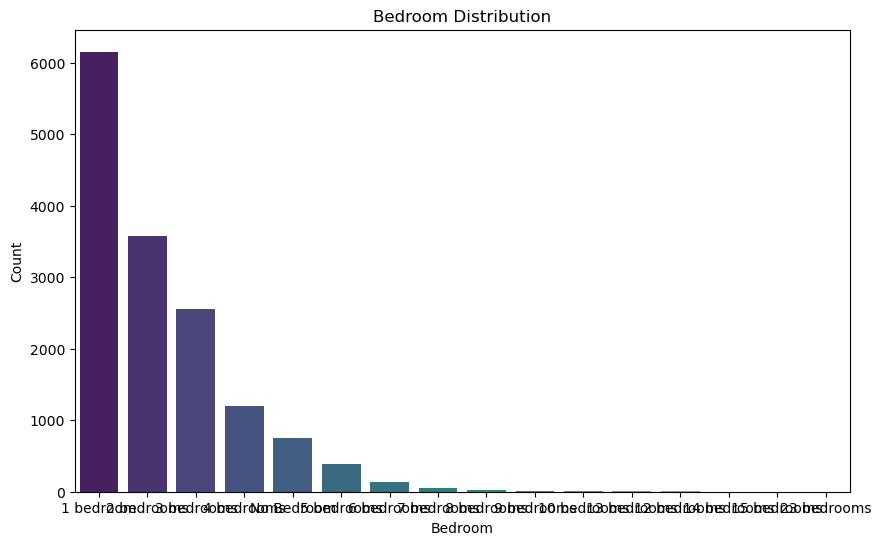

In [66]:
# Assuming 'value_counts_dict["Bedroom"]' is structured correctly
bedroom_data = value_counts_dict["Bedroom"]
bedroom_data.columns = ['Bedroom', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=bedroom_data, x='Bedroom', y='count', palette='viridis')
plt.title('Bedroom Distribution')
plt.xlabel('Bedroom')
plt.ylabel('Count')
plt.show()

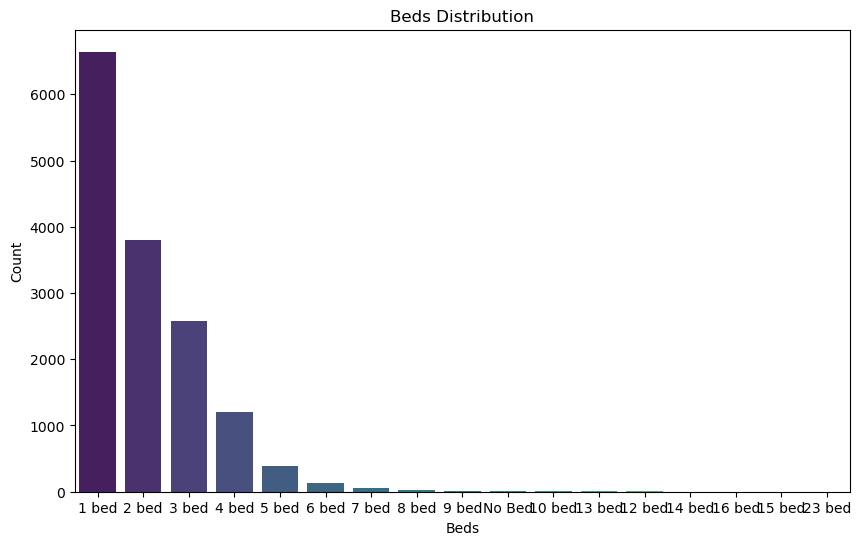

In [67]:
# Assuming 'value_counts_dict["Beds"]' is structured correctly
beds_data = value_counts_dict["Beds"]
beds_data.columns = ['Beds', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=beds_data, x='Beds', y='count', palette='viridis')
plt.title('Beds Distribution')
plt.xlabel('Beds')
plt.ylabel('Count')
plt.show()


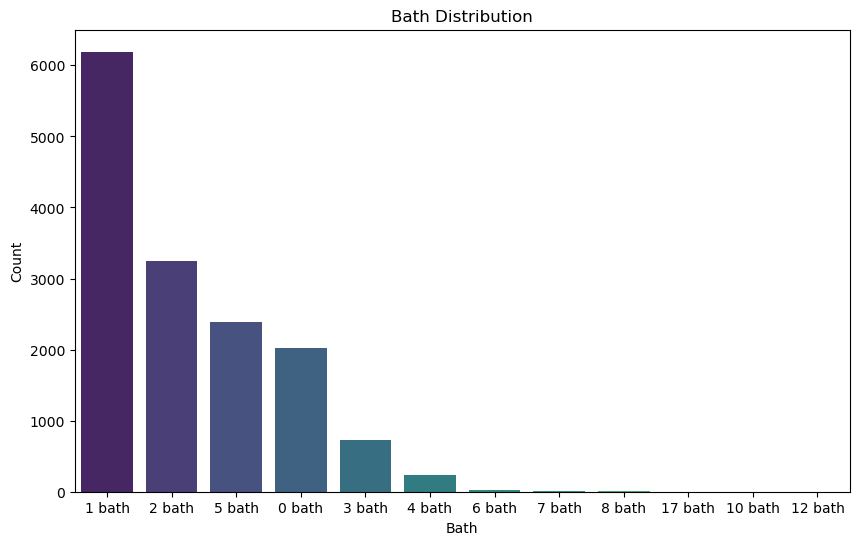

In [68]:
# Assuming 'value_counts_dict["Bath"]' is structured correctly
bath_data = value_counts_dict["Bath"]
bath_data.columns = ['Bath', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=bath_data, x='Bath', y='count', palette='viridis')
plt.title('Bath Distribution')
plt.xlabel('Bath')
plt.ylabel('Count')
plt.show()


In [44]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,Bedroom,Beds,...,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,1 bedroom,1 bed,...,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.45697,-97.78422,1 bedroom,1 bed,...,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.24885,-97.73587,No Bedroom,1 bed,...,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.26034,-97.76487,1 bedroom,1 bed,...,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.23466,-97.73682,1 bedroom,1 bed,...,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN


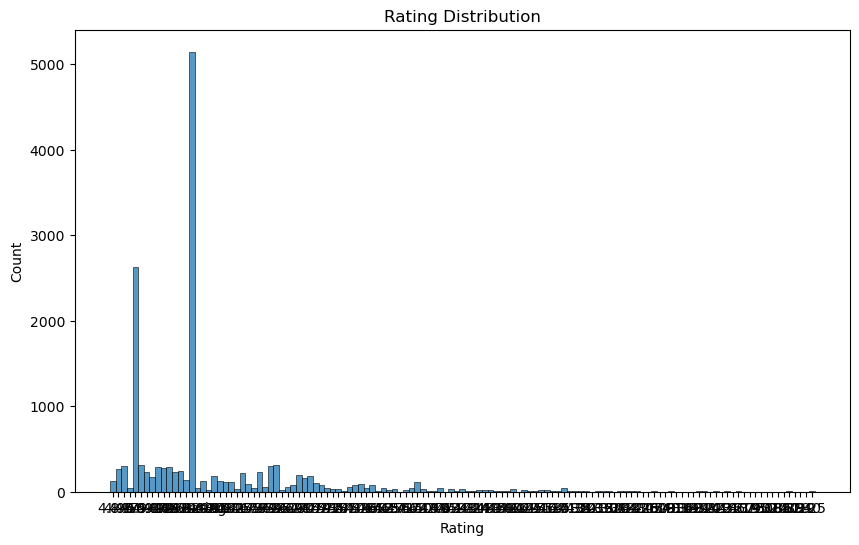

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', binwidth=20)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


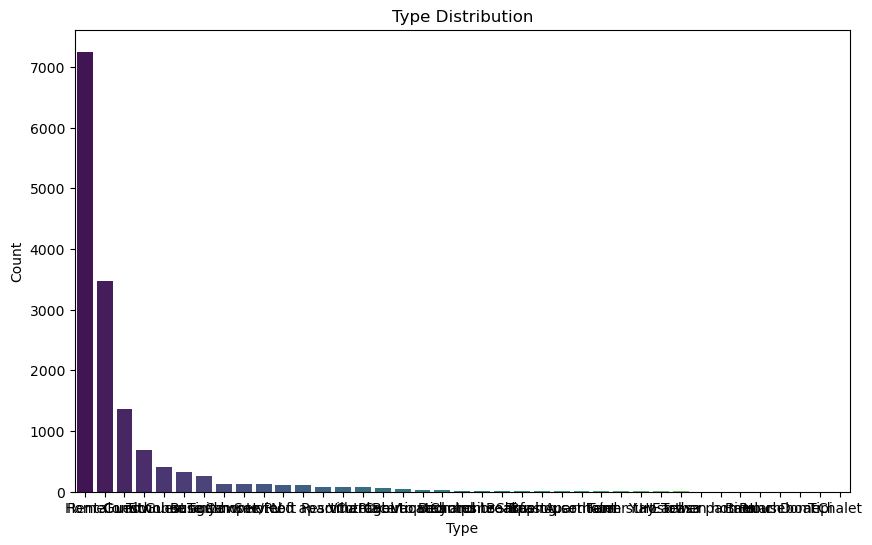

In [70]:
# Assuming 'value_counts_dict["Type"]' is structured correctly
type_data = value_counts_dict["Type"]
type_data.columns = ['Type', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=type_data, x='Type', y='count', palette='viridis')
plt.title('Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


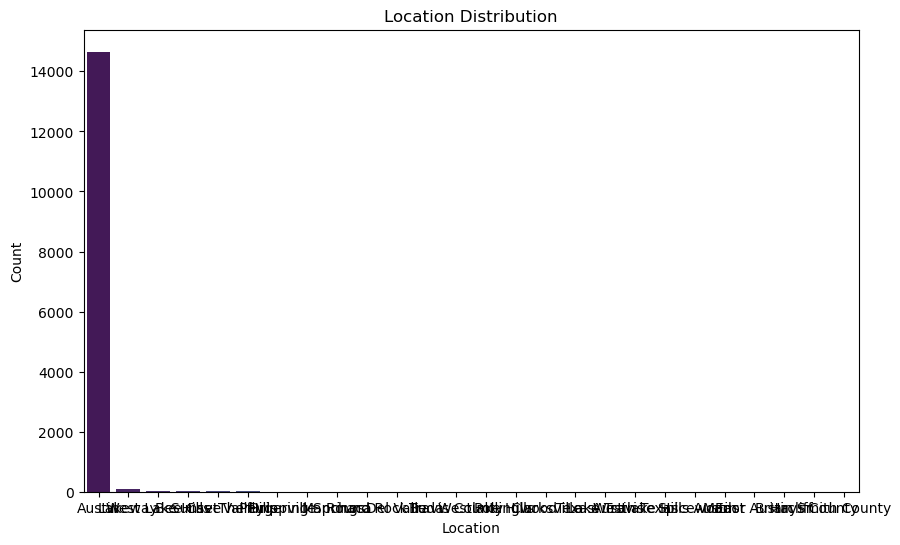

In [71]:
# Assuming 'value_counts_dict["Location"]' is structured correctly
location_data = value_counts_dict["Location"]
location_data.columns = ['Location', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=location_data, x='Location', y='count', palette='viridis')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


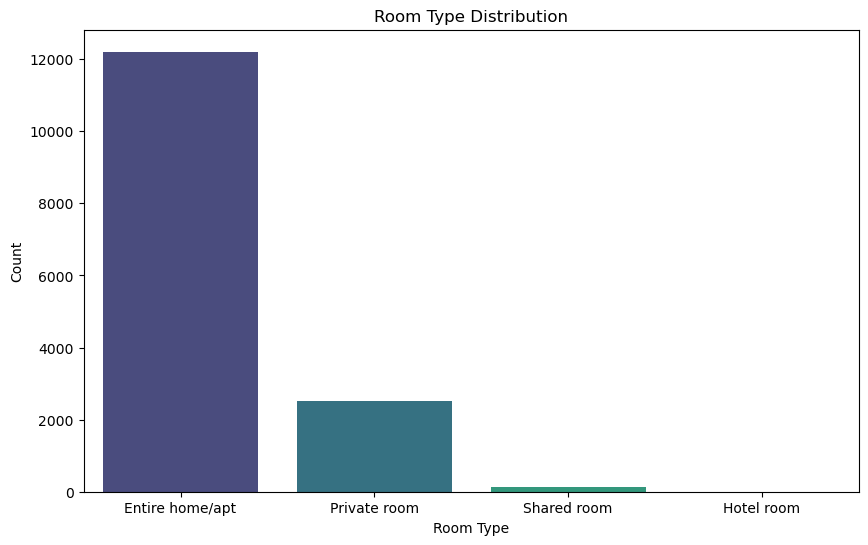

In [72]:
# Assuming 'value_counts_dict["room_type"]' is structured correctly
room_type_data = value_counts_dict["room_type"]
room_type_data.columns = ['room_type', 'count']  # Ensure correct column names

plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_data, x='room_type', y='count', palette='viridis')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()
